In [872]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Probablistic Cone of Uncertainty for an Ensemble of Trajectories

**Reference**

Ortt, D., Hebert, C., Weinzapfel, B., & Eyre, D. (2017, May 1). Development of a Probabilistic Tropical Cyclone Track Uncertainty Cone Using Multi-Model Ensembles. Offshore Technology Conference. doi:10.4043/27931-MS

# Ensemble of trajectory realizations

Consider the path of a particle undergoing a random walk in two dimensions. 

In [873]:
def random_walk(n, dx=0.04, dy=1, sx=2, sy=2):

    x = np.cumsum(np.random.normal(-2 + dx*np.arange(n), sx, n))
    y = np.cumsum(np.random.normal(dy, sy, n))

    x -= x[0]
    y -= y[0]
    
    return x, y

Consider a $n=100$ step random walk generally in the direction of $v_y$ =1 with a varying horizontal velocity going from left to right. At each step there is random perturbation of standard deviation $\sigma=2$.

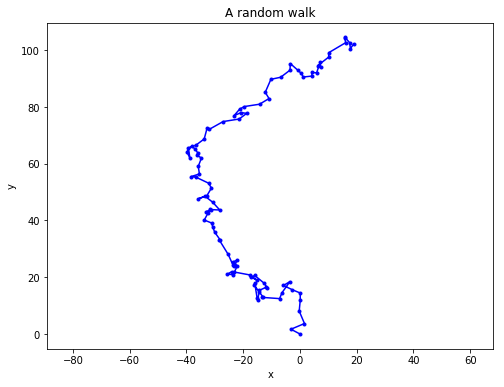

In [875]:
n = 100
fig, ax = plt.subplots(figsize=(8,6))
x, y = random_walk(n)
plt.plot(x,y, 'b.-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('A random walk')
plt.axis('equal')
plt.show()

We can generate an ensemble of m=50 random walks.

In [876]:
m = 50
x_data = []
y_data = []
for i in range(m):
    x, y = random_walk(n)
    x_data.append(x)
    y_data.append(y)
    
x_data = np.array(x_data)
y_data = np.array(y_data)

We can plot all of the trajectories together.

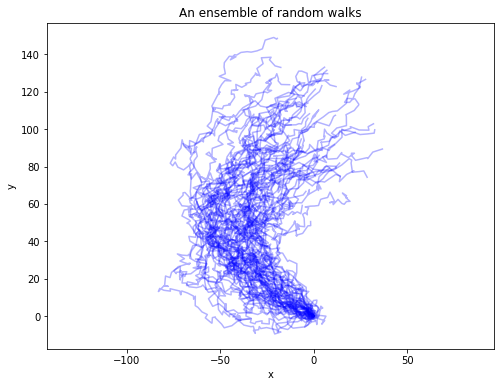

In [877]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(x_data.T, y_data.T, 'b-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('An ensemble of random walks')
plt.axis('equal')
plt.show()

# Ensemble Probalistic Swath

If we collect all of the locations into a sigle array, we can determine the probability that the particle will be near a certain $x,y$ position at some time over the random walk. The mean path is the average position at every time step.

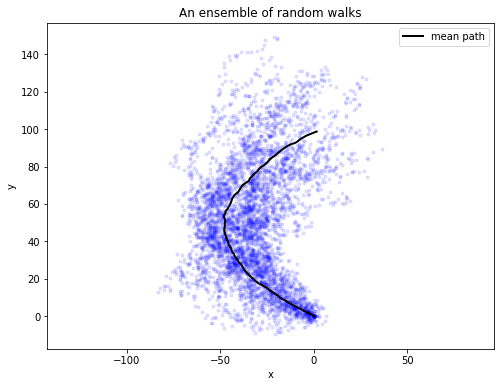

In [911]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(x_data.T, y_data.T, 'b.',  alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('An ensemble of random walks')

plt.plot(np.mean(x_data, 0), np.mean(y_data, 0), 'k-', linewidth=2, label='mean path')

plt.legend()
plt.axis('equal')
plt.show()

Create a grid of possible locations for the particle. The grid boxes are each 10 by 10. The horizontal and vertical extents are chosen by looking at the bounding box of all ensemble data.

In [912]:
dx = 10
dy = 10
X, Y = np.mgrid[-150:100:dx, -25:175:dx]
Z = np.zeros_like(X, dtype='int')

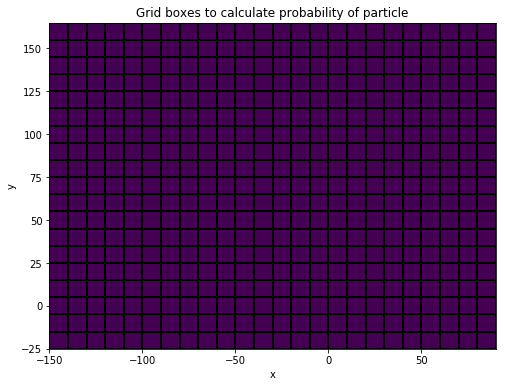

In [913]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pcolormesh(X, Y, Z, edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grid boxes to calculate probability of particle')
plt.show()

For each realization, we can add +1 to this matrix if the particle comes within a circle of radius r= 20. 

*(In the iceberg problem, this would be a minimum safe distance away from an iceberg.)*

In [1043]:
r = 20

Z_ = np.zeros_like(Z)
for x_, y_ in zip(x_data[0], y_data[0]):
    Z_[np.sqrt((X+dx/2-x_)**2 + (Y+dy/2-y_)**2) <= r] = 1

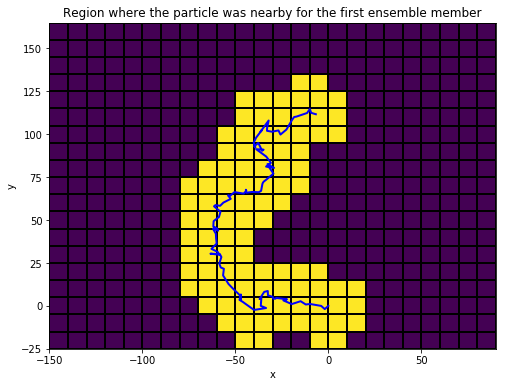

In [1044]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pcolormesh(X, Y, Z_, edgecolor='k')
plt.plot(x_data[0], y_data[0], 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Region where the particle was nearby for the first ensemble member')
plt.show()

We can do this for all the ensemble realizations to create a probalistic map of where the particle could be.

In [1045]:
Z = np.zeros_like(X, dtype='int')
for x, y in zip(x_data, y_data):
    Z_ = np.zeros_like(Z)
    for x_, y_ in zip(x, y):
        Z_[np.sqrt((X+dx/2-x_)**2 + (Y+dy/2-y_)**2) < r] = 1
    Z += Z_
    
# divide by the realizations to come up with a probability
Z = Z / m

So now we have a map showing the probability that the particle would be at a particular location *at some point over the simulation*.

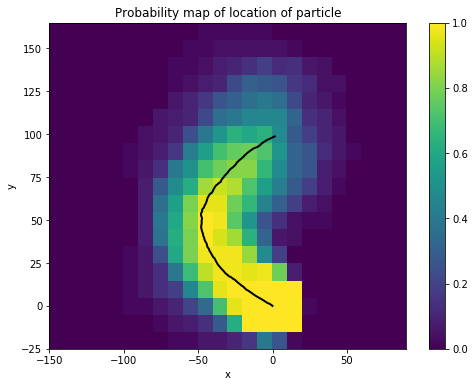

In [1046]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pcolormesh(X, Y, Z )
plt.colorbar()
plt.plot(np.mean(x_data, 0), np.mean(y_data, 0), 'k-', linewidth=2)
plt.title('Probability map of location of particle')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We could plot this a few different ways. Using a masked array:

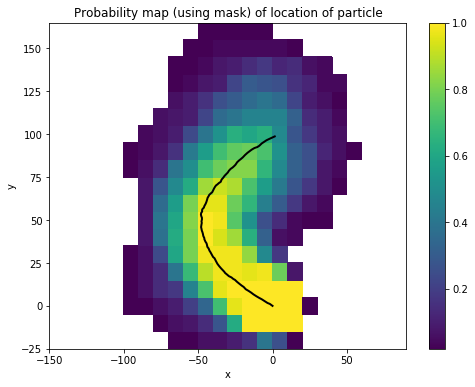

In [1047]:
Z_masked = np.ma.MaskedArray(Z, Z==0)

fig, ax = plt.subplots(figsize=(8,6))
plt.pcolormesh(X, Y, Z_masked )
plt.colorbar()
plt.plot(np.mean(x_data, 0), np.mean(y_data, 0), 'k-', linewidth=2)
plt.title('Probability map (using mask) of location of particle')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Or a contour plot:

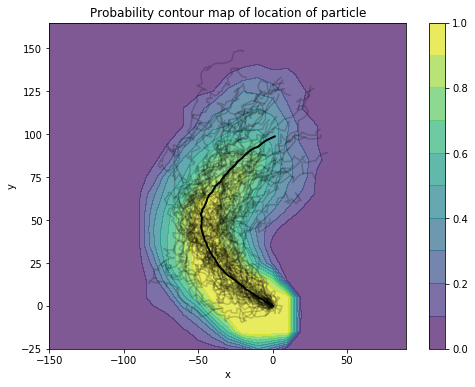

In [1074]:
fig, ax = plt.subplots(figsize=(8,6))
n_levels=np.arange(0, 1.1, 0.1)

plt.contourf(X, Y, Z, n_levels, alpha=0.7)

plt.plot(x_data.T, y_data.T, 'k-',  alpha=0.2, linewidth=1.5);
plt.plot(np.mean(x_data, 0), np.mean(y_data, 0), 'k-', linewidth=2)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Probability contour map of location of particle')
plt.show()